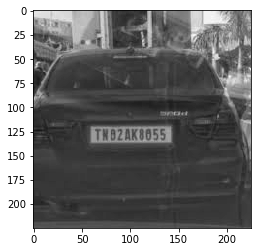

In [140]:
import matplotlib.pyplot as plt
import matplotlib.image as img

image = img.imread('c:\\Users\\windows10\\desktop\\proj\\vehicle\\car9.jpg')
gray = plt.imshow(image[:,:,1], cmap='gray', vmin = 0, vmax = 255,interpolation='none')

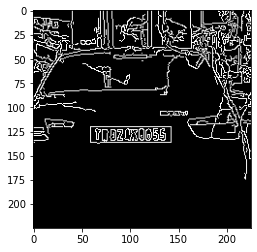

In [126]:
import cv2

bfilter = cv2.bilateralFilter(image, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [127]:
import imutils

keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [128]:
location

array([[[ 59, 120]],

       [[ 59, 136]],

       [[142, 136]],

       [[142, 120]]], dtype=int32)

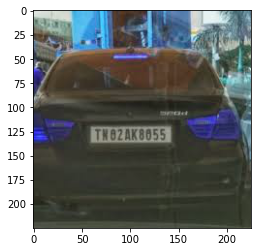

In [129]:
import numpy as np

mask = np.zeros(image.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(image, image, mask)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [131]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = image[x1:x2+1, y1:y2+1]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)) = c

SyntaxError: cannot assign to function call (<ipython-input-131-2476c1374e59>, line 6)

In [135]:
import easyocr

#reader = easyocr.Reader(['en'])
#result = reader.readtext(cropped_image)
result = c
result1 = cropped_image
result, result1

(<matplotlib.image.AxesImage at 0x1d853b4b1f0>,
 array([[[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],
 
        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],
 
        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],
 
        ...,
 
        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],
 
        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],
 
        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255, 

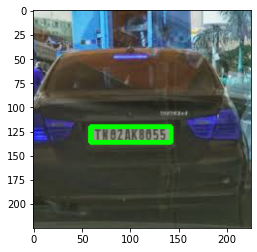

In [133]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
#res = cv2.putText(image, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(image, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))